# Klassifikation (für PE)
**Feature:**
- '∆Hm in Jg-1',
-  'TStart in °C'
-  'TEnd in °C'
-  'Tm in °C'
-  (Hm)
-  'Modality'

**Target:** 'Aging Level'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [3]:
import pandas as pd

In [4]:
file_path_data = "data/052_Data_2st_Heating_PE.csv"

df_data = pd.read_csv(file_path_data)
df_data

,Sample Name,Name of Original DSC Measurement,Mass in mg,∆Hm in Jg-1,Segment,Polymer,TStart in °C,TEnd in °C,Tm in °C,Tm,Hm,Modality,Tail,Shoulder,Aging Level
0,0-PE-1_1,0-PE-6,1.17,108.10,2nd Heating,PE,50.0,118.380,107.7,108,8.79001,sharp,left,undefined,Pristine LDPE and PET
1,0-PE-1_2,0-PE-7,1.22,107.90,2nd Heating,PE,50.0,119.300,107.7,108,8.76131,sharp,left,undefined,Pristine LDPE and PET
2,0-PE-1_3,0-PE-8,1.19,108.10,2nd Heating,PE,50.0,118.900,107.6,108,8.71668,sharp,left,undefined,Pristine LDPE and PET
3,0-PE-1_4,0-PE-9,1.27,109.40,2nd Heating,PE,50.0,118.200,107.7,108,8.40655,sharp,left,undefined,Pristine LDPE and PET
4,0-PE-1_5,0-PE-10,1.41,107.10,2nd Heating,PE,50.0,119.000,107.8,108,7.96444,sharp,left,undefined,Pristine LDPE and PET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,3-EBT-PE-4_1,eb-PE-56,1.34,75.67,2nd Heating,PE,52.5,111.680,93.4,93,6.68234,wide,left,undefined,Third EBT
133,3-EBT-PE-4_2,eb-PE-57,1.38,74.97,2nd Heating,PE,55.0,109.080,93.6,94,6.46357,wide,left,undefined,Third EBT
134,3-EBT-PE-4_3,eb-PE-58,1.35,75.39,2nd Heating,PE,55.0,112.292,93.2,93,6.72744,wide,left,undefined,Third EBT
135,3-EBT-PE-4_4,eb-PE-59,1.36,72.86,2nd Heating,PE,54.6,112.900,93.4,93,6.29116,wide,left,undefined,Third EBT


In [5]:
for v in df_data["Aging Level"].unique():
    print(v)

Pristine LDPE and PET
First UV-cycle (4 weeks irradiation)
Second UV-cycle (8 weeks irradiation)
Third UV-cycle (12 weks irradiation)
First EBT
Second EBT
Third EBT


In [6]:
df_data.columns

Index(['Sample Name', 'Name of Original DSC Measurement', 'Mass in mg',
       '∆Hm in Jg-1', 'Segment', 'Polymer', 'TStart in °C', 'TEnd in °C',
       'Tm in °C', 'Tm', 'Hm', 'Modality', 'Tail', 'Shoulder', 'Aging Level'],
      dtype='object')

In [7]:
# Häufigkeiten der Werte für jede Spalte berechnen und einzeln anzeigen
print(f"{df_data['Modality'].value_counts()}\n")
print(f"{df_data['Tail'].value_counts()}\n")
print(f"{df_data['Shoulder'].value_counts()}")

Modality
sharp      78
wide       39
bimodal    20
Name: count, dtype: int64

Tail
left    137
Name: count, dtype: int64

Shoulder
undefined    137
Name: count, dtype: int64


## A) Random Forest Classifier (without Hm)

In [9]:
# Datenvorbereitung

# ohne 'Sample Name', 'Name of Original DSC Measurement', 'Mass in mg'
features = [
    '∆Hm in Jg-1', 'TStart in °C', 'TEnd in °C', 'Tm in °C',
    'Modality'
]
target = 'Aging Level'

# Merkmalsauswahl und Zielspalte
X = df_data[features]
y = df_data[target]

In [10]:
# Kategorische Variablen in numerische Form umwandeln
X = pd.get_dummies(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Random Forest Modell
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Vorhersage
y_pred = rf_model.predict(X_test)

# Bewertung
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.9285714285714286
                                       precision    recall  f1-score   support

                            First EBT       1.00      1.00      1.00         3
 First UV-cycle (4 weeks irradiation)       1.00      1.00      1.00         5
                Pristine LDPE and PET       0.75      0.75      0.75         4
                           Second EBT       1.00      1.00      1.00         5
Second UV-cycle (8 weeks irradiation)       0.75      1.00      0.86         3
                            Third EBT       1.00      1.00      1.00         4
 Third UV-cycle (12 weks irradiation)       1.00      0.75      0.86         4

                             accuracy                           0.93        28
                            macro avg       0.93      0.93      0.92        28
                         weighted avg       0.94      0.93      0.93        28



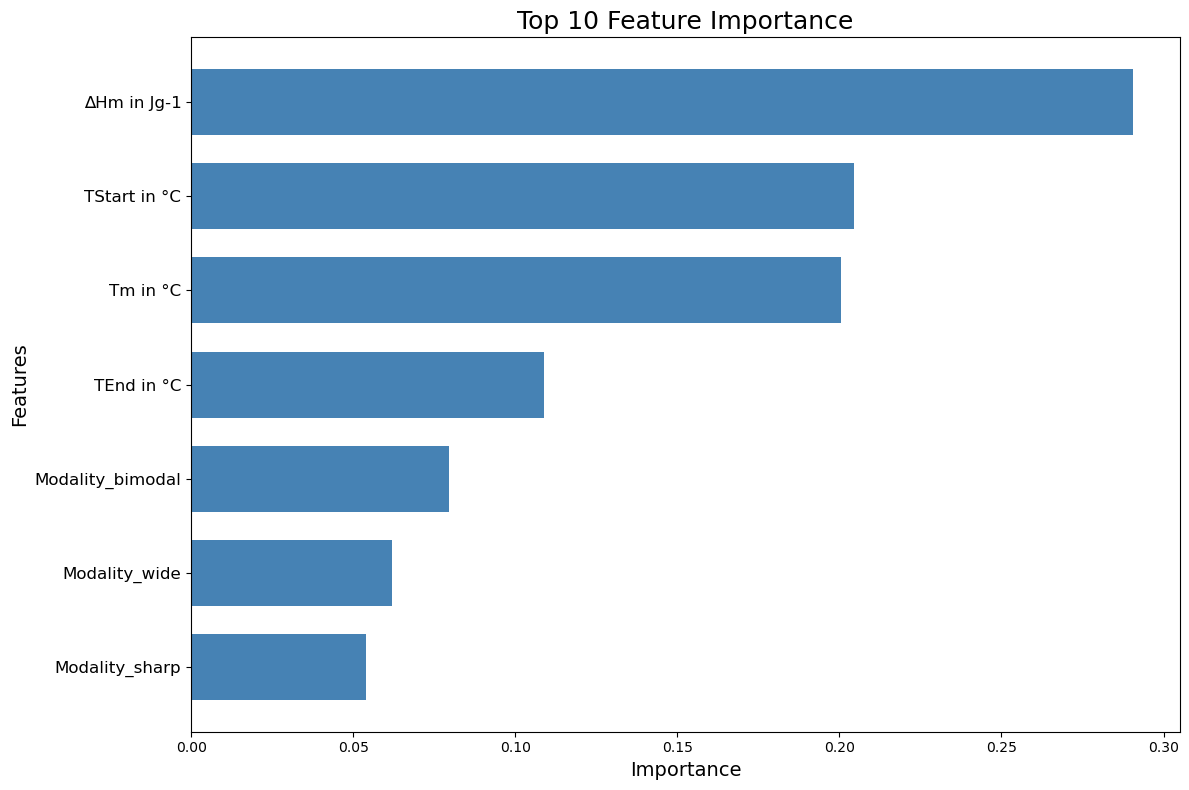

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Feature-Wichtigkeiten extrahieren
feature_importance = rf_model.feature_importances_
features = X.columns  # Nach get_dummies

# Sortieren und Visualisieren
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Top 10 Features auswählen
top_10_features = importance_df.head(10)

plt.figure(figsize=(12, 8))  # Breite und Höhe anpassen
plt.barh(top_10_features['Feature'], top_10_features['Importance'], height=0.7, color="steelblue")
plt.title('Top 10 Feature Importance', fontsize=18)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.yticks(fontsize=12)  # Lesbare Schriftgröße
plt.gca().invert_yaxis()  # Sortierung von oben nach unten
plt.tight_layout()
plt.show()

In [14]:
# Testen mit verschiedenen random_states
random_states = [0, 1, 2, 3, 10, 20, 42, 70, 100, 1000]
results = {}

for state in random_states:
    # Train-Test-Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=state)
    
    # Random Forest Modell
    rf_model = RandomForestClassifier(random_state=state)
    rf_model.fit(X_train, y_train)
    
    # Vorhersage
    y_pred = rf_model.predict(X_test)
    
    # Bewertung
    accuracy = accuracy_score(y_test, y_pred)
    results[state] = accuracy

results

{0: 0.8928571428571429,
 1: 0.9285714285714286,
 2: 0.8214285714285714,
 3: 0.9285714285714286,
 10: 0.8928571428571429,
 20: 1.0,
 42: 0.9285714285714286,
 70: 0.9642857142857143,
 100: 1.0,
 1000: 0.9285714285714286}

## B) Random Forest Classifier (with Hm)

In [16]:
# Datenvorbereitung
# ohne 'Sample Name', 'Name of Original DSC Measurement', 'Mass in mg'
features = [
    '∆Hm in Jg-1', 'TStart in °C', 'TEnd in °C', 'Tm in °C',
    'Hm',
    'Modality'
]
target = 'Aging Level'

# Merkmalsauswahl und Zielspalte
X = df_data[features]
y = df_data[target]


# Kategorische Variablen in numerische Form umwandeln
X = pd.get_dummies(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Random Forest Modell
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Vorhersage
y_pred = rf_model.predict(X_test)

# Bewertung
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8928571428571429
                                       precision    recall  f1-score   support

                            First EBT       1.00      1.00      1.00         3
 First UV-cycle (4 weeks irradiation)       1.00      1.00      1.00         5
                Pristine LDPE and PET       0.67      0.50      0.57         4
                           Second EBT       1.00      1.00      1.00         5
Second UV-cycle (8 weeks irradiation)       0.60      1.00      0.75         3
                            Third EBT       1.00      1.00      1.00         4
 Third UV-cycle (12 weks irradiation)       1.00      0.75      0.86         4

                             accuracy                           0.89        28
                            macro avg       0.90      0.89      0.88        28
                         weighted avg       0.91      0.89      0.89        28



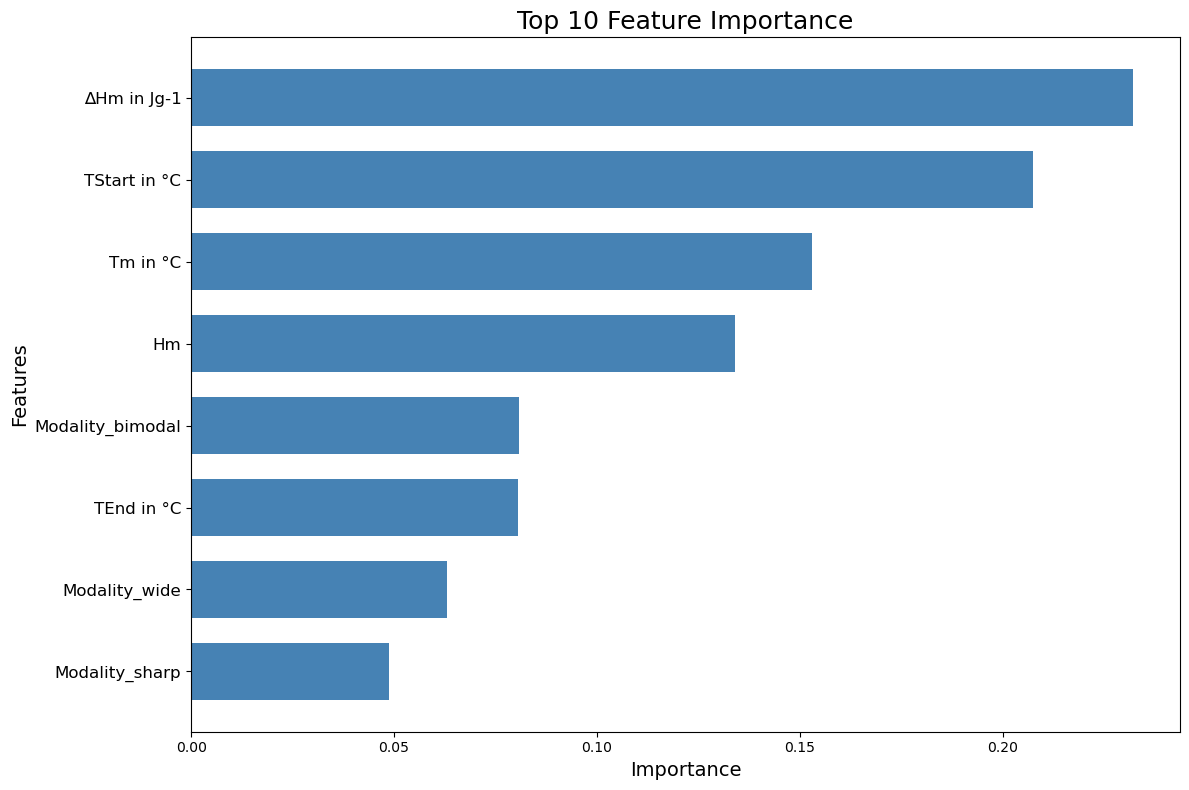

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Feature-Wichtigkeiten extrahieren
feature_importance = rf_model.feature_importances_
features = X.columns  # Nach get_dummies

# Sortieren und Visualisieren
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Top 10 Features auswählen
top_10_features = importance_df.head(10)

plt.figure(figsize=(12, 8))  # Breite und Höhe anpassen
plt.barh(top_10_features['Feature'], top_10_features['Importance'], height=0.7, color="steelblue")
plt.title('Top 10 Feature Importance', fontsize=18)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.yticks(fontsize=12)  # Lesbare Schriftgröße
plt.gca().invert_yaxis()  # Sortierung von oben nach unten
plt.tight_layout()
plt.show()

In [18]:
# Testen mit verschiedenen random_states
random_states = [0, 1, 2, 3, 10, 20, 42, 70, 100, 1000]
results = {}

for state in random_states:
    # Train-Test-Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=state)
    
    # Random Forest Modell
    rf_model = RandomForestClassifier(random_state=state)
    rf_model.fit(X_train, y_train)
    
    # Vorhersage
    y_pred = rf_model.predict(X_test)
    
    # Bewertung
    accuracy = accuracy_score(y_test, y_pred)
    results[state] = accuracy

results

{0: 0.8928571428571429,
 1: 0.9285714285714286,
 2: 1.0,
 3: 0.9642857142857143,
 10: 1.0,
 20: 1.0,
 42: 0.8928571428571429,
 70: 0.8928571428571429,
 100: 1.0,
 1000: 0.9642857142857143}

In [19]:
mean_value = sum(results.values()) / len(results)
print(f"Ø Genauigkeit: {mean_value}")

Ø Genauigkeit: 0.9535714285714286
